# Iris Flower Species Clustering Model

## Import Utilization Tools
(Run before starting any code)

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [32]:
iris = pd.read_csv("IRIS.csv")

## Variables
What type of data that is being used and the first 5 entries.

In [33]:
x = iris.iloc[:, [0, 1, 2, 3]].values
iris.info()
iris[0:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## What are the species and the frequency they appear in the dataset.

In [34]:
iris_species = pd.crosstab(index=iris["species"], columns="count")     

iris_species

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [35]:
I_S=iris.loc[iris["species"]=="Iris-setosa"]
I_Vi=iris.loc[iris["species"]=="Iris-virginica"]
I_Ve=iris.loc[iris["species"]=="Iris-versicolor"]

## Histrogram of the 3 species and their (4)different measurements.

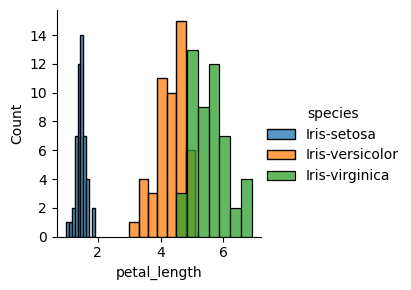

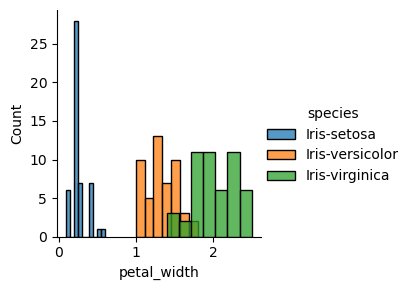

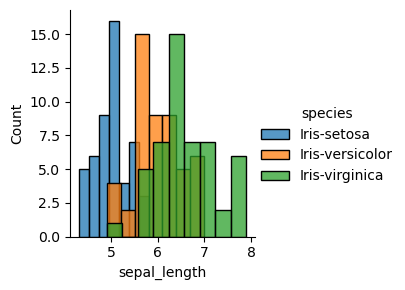

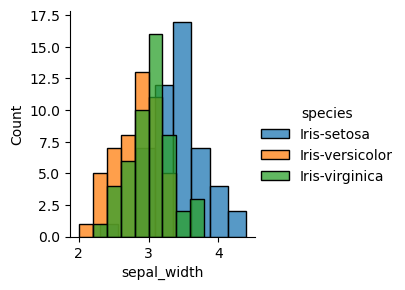

In [36]:
sns.FacetGrid(iris,hue="species",height=3).map(sns.histplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.histplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.histplot,"sepal_length").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.histplot,"sepal_width").add_legend()
plt.show()

## Each species values compared/their boxplots

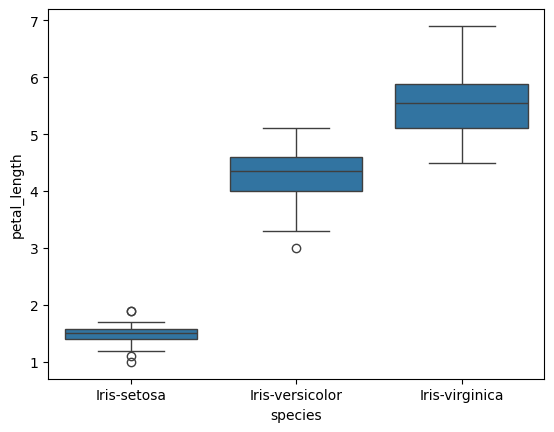

In [37]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

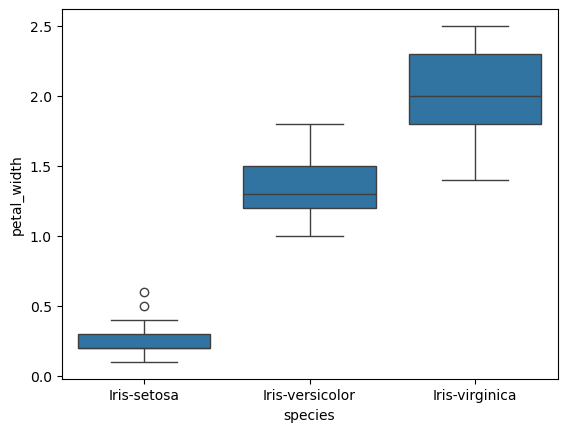

In [38]:
sns.boxplot(x="species",y="petal_width",data=iris)
plt.show()

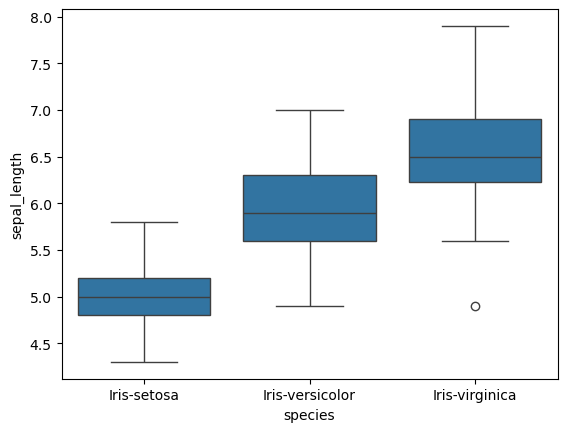

In [39]:
sns.boxplot(x="species",y="sepal_length",data=iris)
plt.show()

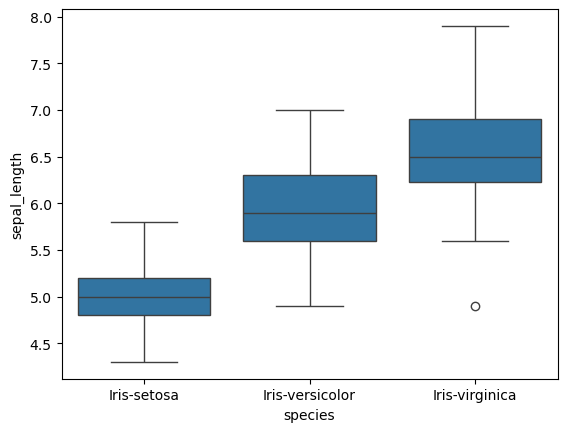

In [40]:
sns.boxplot(x="species",y="sepal_length",data=iris)
plt.show()

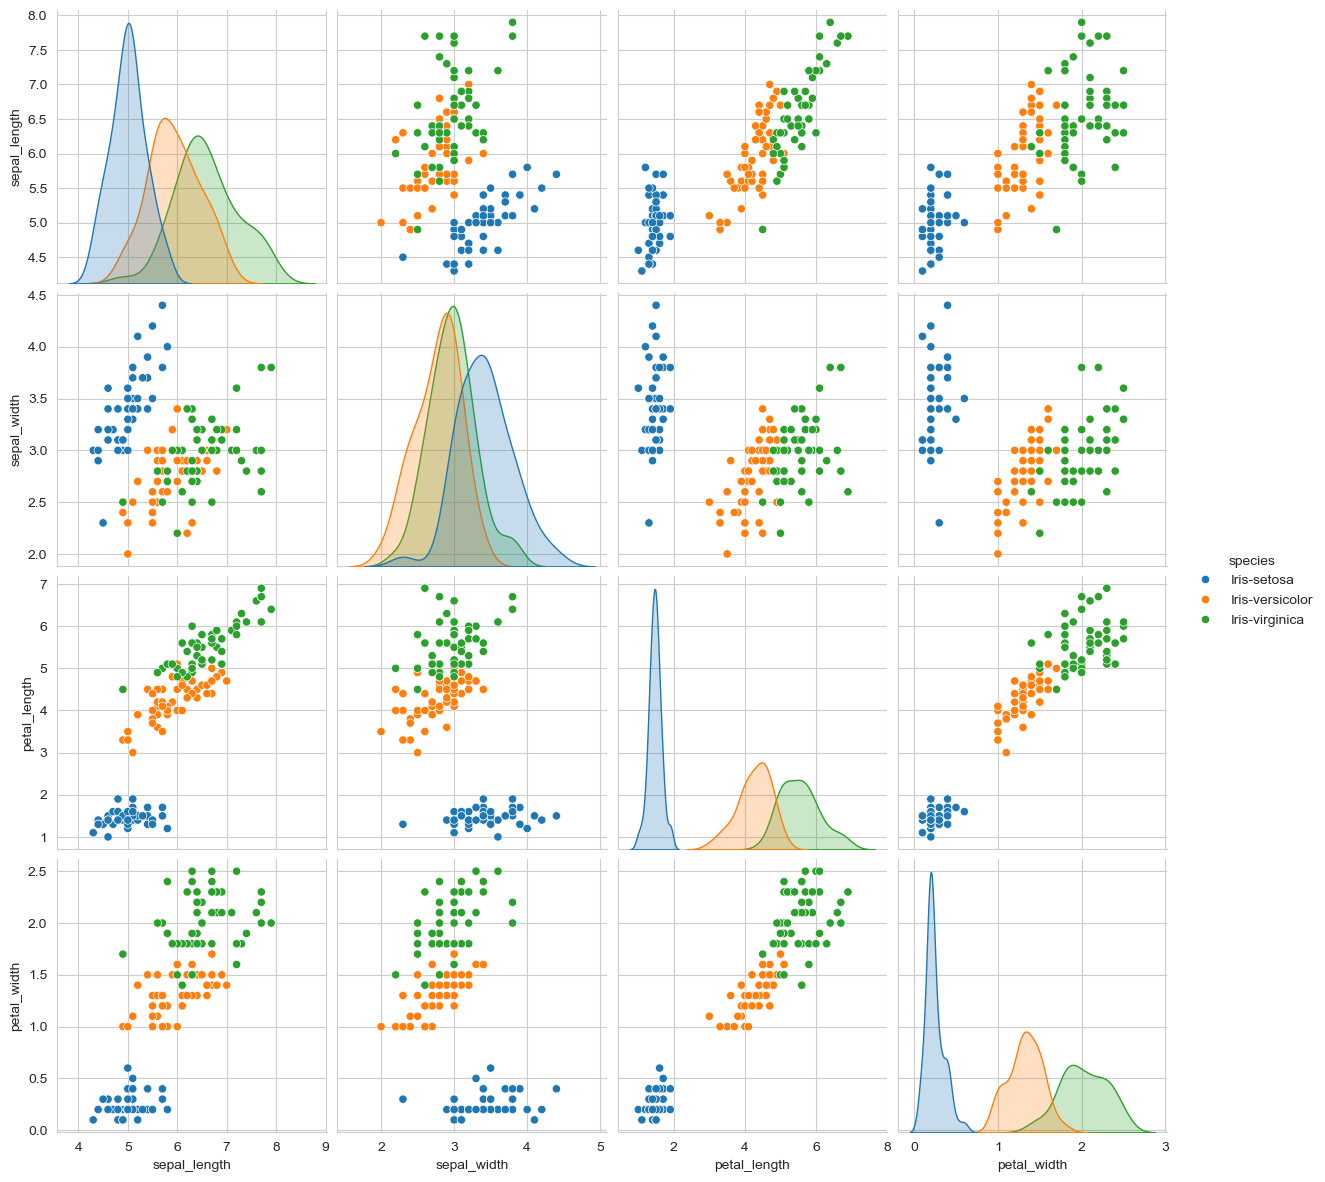

In [44]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",height=3);
plt.show()

# K-Clustering
### First import Kmeans clustering

In [52]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Set the environment variable

# Restart the kernel if this was not done at the very beginning


In [53]:
import numpy as np
from sklearn.cluster import KMeans
import warnings

# Optionally suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster")

In [54]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)